## <b> <center> ACM-AI Task - LIFE EXPECTANCY </center> </b> 

### <b> DATA LOADING </b>

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('Life-Expectancy-Data-Updated.csv')

### <b> EXPLORATORY DATA ANALYSIS </b>

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [160]:
pd.isnull(data).sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

### <b> CORRELATION HEATMAPS </b>

<AxesSubplot: >

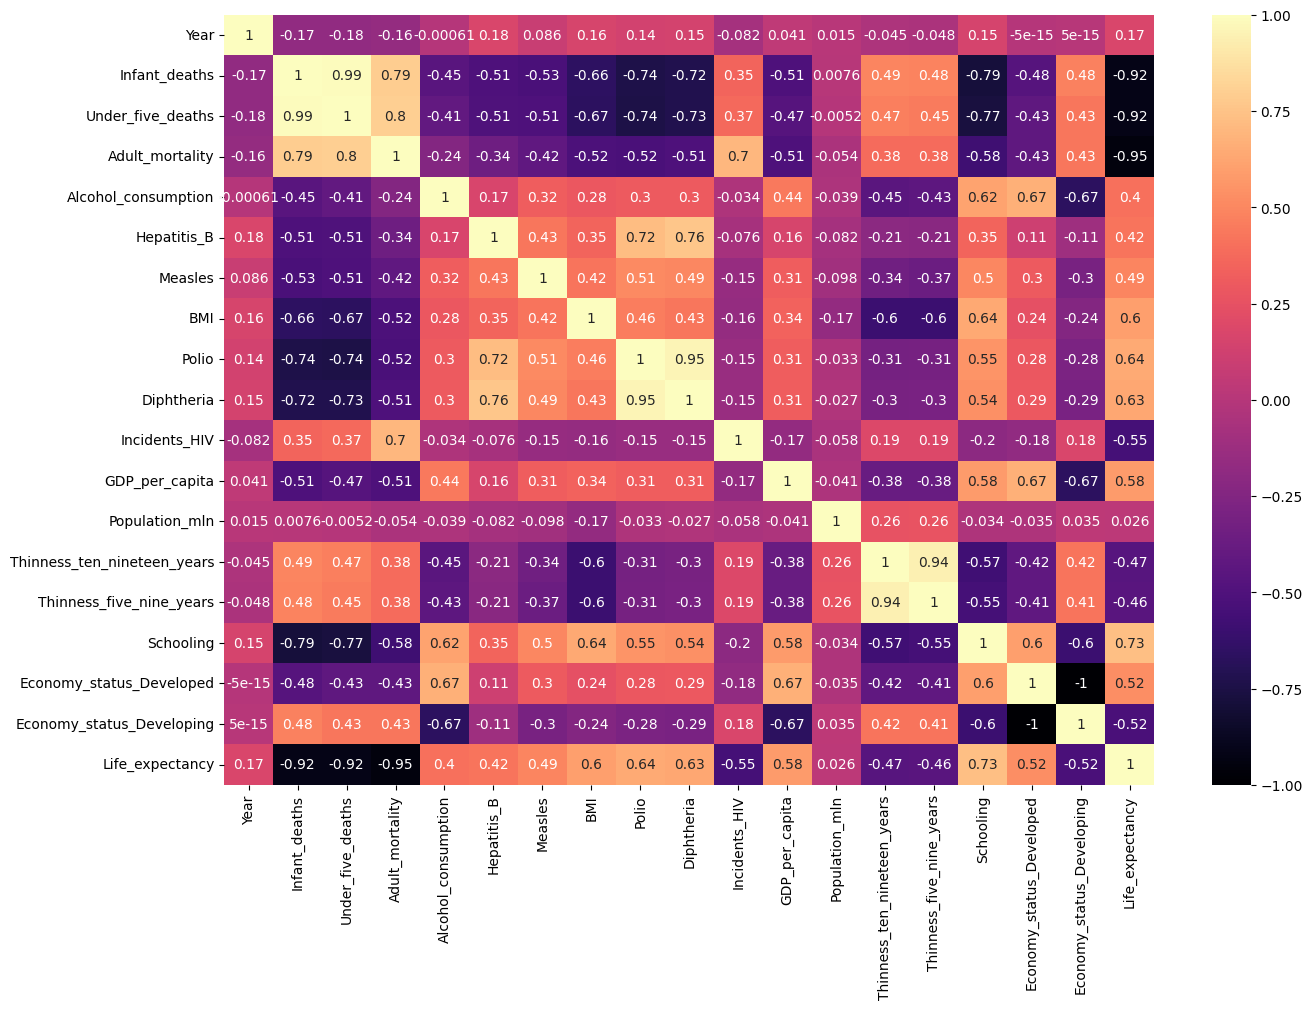

In [161]:
cm = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='magma')

In [162]:
data.drop(['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Incidents_HIV', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Economy_status_Developing'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2864 non-null   object 
 1   Region                    2864 non-null   object 
 2   Year                      2864 non-null   int64  
 3   Alcohol_consumption       2864 non-null   float64
 4   Hepatitis_B               2864 non-null   int64  
 5   Measles                   2864 non-null   int64  
 6   BMI                       2864 non-null   float64
 7   Polio                     2864 non-null   int64  
 8   Diphtheria                2864 non-null   int64  
 9   GDP_per_capita            2864 non-null   int64  
 10  Population_mln            2864 non-null   float64
 11  Schooling                 2864 non-null   float64
 12  Economy_status_Developed  2864 non-null   int64  
 13  Life_expectancy           2864 non-null   float64
dtypes: float

<AxesSubplot: >

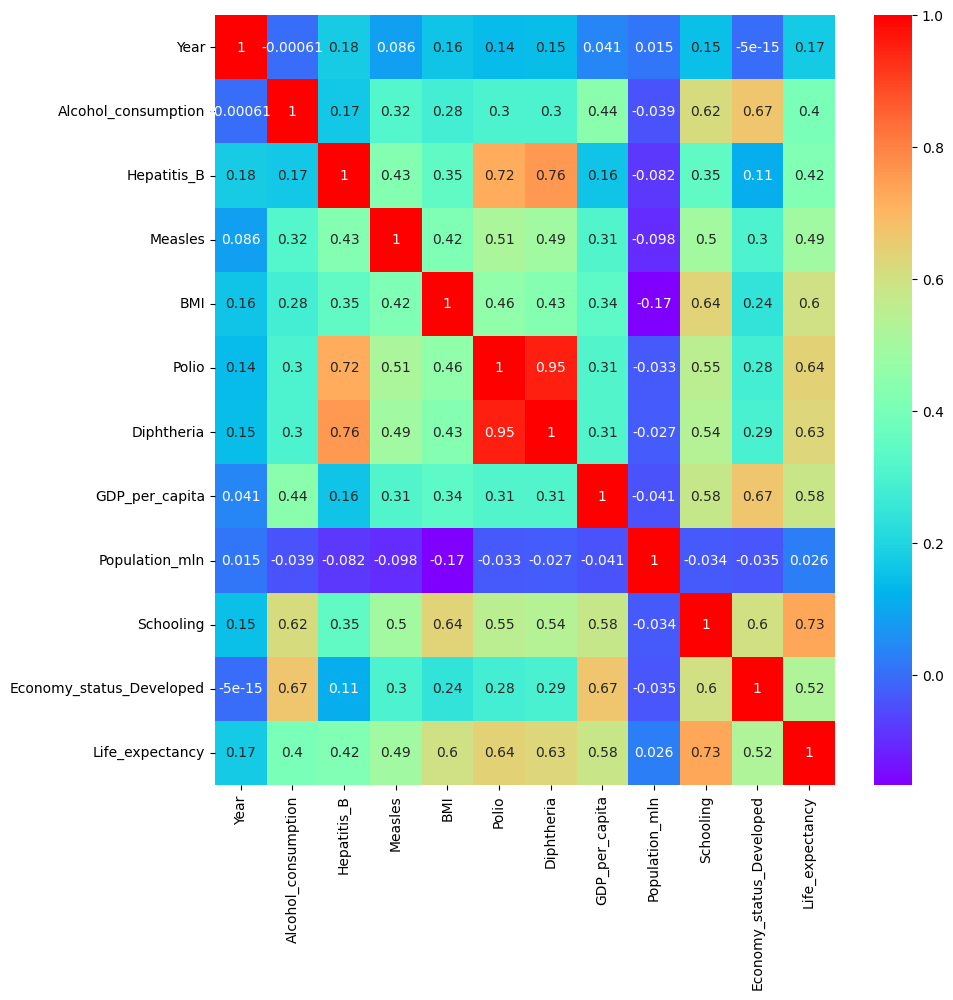

In [163]:
cm = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='rainbow')

### <b> MIN-MAX SCALING </b>

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Life_exp', 'Alcohol', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Economy', 'Schooling']] = scaler.fit_transform(data[['Life_expectancy', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'GDP_per_capita', 'Population_mln', 'Economy_status_Developed', 'Schooling']])
data.head()

,Country,Region,Year,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,GDP_per_capita,Population_mln,Schooling,Economy_status_Developed,Life_expectancy,Life_exp,Alcohol,GDP,Population,Economy
0,Turkiye,Middle East,2015,1.32,0.977011,0.617978,0.650407,0.978022,0.975904,11006,78.53,0.515385,0,76.5,0.835586,0.073867,0.096713,0.056857,0.0
1,Spain,European Union,2015,10.35,0.977011,0.943820,0.504065,0.978022,0.975904,25742,46.44,0.661538,1,82.8,0.977477,0.579183,0.227968,0.033600,1.0
2,India,Asia,2007,1.57,0.551724,0.280899,0.113821,0.648352,0.578313,1076,1183.21,0.300000,0,65.4,0.585586,0.087857,0.008266,0.857477,0.0
3,Guyana,South America,2006,5.68,0.931034,0.719101,0.447154,0.923077,0.927711,4146,0.75,0.523077,0,67.0,0.621622,0.317851,0.035611,0.000486,0.0
4,Israel,Middle East,2012,2.89,0.977011,0.887640,0.585366,0.945055,0.939759,33995,7.91,0.900000,1,81.7,0.952703,0.161724,0.301479,0.005675,1.0


In [165]:
len(dict(data['Country'].value_counts()).keys())

179

In [166]:
repl_dict_reg = {"Africa": 1, "Asia": 2, "Central America and Caribbean": 3,
                    "European Union": 4, "Middle East": 5, "North America": 6,
                    "Oceania": 7, "Rest of Europe": 8, "South America": 9}

data["Region"] = data["Region"].replace(repl_dict_reg)
data.head()


,Country,Region,Year,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,GDP_per_capita,Population_mln,Schooling,Economy_status_Developed,Life_expectancy,Life_exp,Alcohol,GDP,Population,Economy
0,Turkiye,5,2015,1.32,0.977011,0.617978,0.650407,0.978022,0.975904,11006,78.53,0.515385,0,76.5,0.835586,0.073867,0.096713,0.056857,0.0
1,Spain,4,2015,10.35,0.977011,0.943820,0.504065,0.978022,0.975904,25742,46.44,0.661538,1,82.8,0.977477,0.579183,0.227968,0.033600,1.0
2,India,2,2007,1.57,0.551724,0.280899,0.113821,0.648352,0.578313,1076,1183.21,0.300000,0,65.4,0.585586,0.087857,0.008266,0.857477,0.0
3,Guyana,9,2006,5.68,0.931034,0.719101,0.447154,0.923077,0.927711,4146,0.75,0.523077,0,67.0,0.621622,0.317851,0.035611,0.000486,0.0
4,Israel,5,2012,2.89,0.977011,0.887640,0.585366,0.945055,0.939759,33995,7.91,0.900000,1,81.7,0.952703,0.161724,0.301479,0.005675,1.0


### <b> LABEL ENCODER </b>

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])
data.head()

,Country,Region,Year,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,GDP_per_capita,Population_mln,Schooling,Economy_status_Developed,Life_expectancy,Life_exp,Alcohol,GDP,Population,Economy
0,164,5,2015,1.32,0.977011,0.617978,0.650407,0.978022,0.975904,11006,78.53,0.515385,0,76.5,0.835586,0.073867,0.096713,0.056857,0.0
1,148,4,2015,10.35,0.977011,0.943820,0.504065,0.978022,0.975904,25742,46.44,0.661538,1,82.8,0.977477,0.579183,0.227968,0.033600,1.0
2,74,2,2007,1.57,0.551724,0.280899,0.113821,0.648352,0.578313,1076,1183.21,0.300000,0,65.4,0.585586,0.087857,0.008266,0.857477,0.0
3,69,9,2006,5.68,0.931034,0.719101,0.447154,0.923077,0.927711,4146,0.75,0.523077,0,67.0,0.621622,0.317851,0.035611,0.000486,0.0
4,79,5,2012,2.89,0.977011,0.887640,0.585366,0.945055,0.939759,33995,7.91,0.900000,1,81.7,0.952703,0.161724,0.301479,0.005675,1.0


In [168]:
data.shape

(2864, 19)

### <b> ANN MODEL </b>

In [169]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

# Split the data into training and testing sets
X = data.drop(['Life_expectancy'], axis=1)
y = data['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

cf = Sequential()
cf.add(Dense(units=32, kernel_initializer=
             'uniform', activation='relu'))
cf.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
cf.add(Dropout(0.2))
cf.add(Dense(units=256, kernel_initializer='uniform', activation='relu'))
cf.add(Dropout(0.2))
cf.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
cf.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

opt = Adam()

cf.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

history = cf.fit(X_train, y_train,epochs = 5,validation_split = 0.2)

Epoch 1/5
58/58 [==============================] - 0s 3ms/step - loss: 1253.9840 - mae: 27.1174 - val_loss: 57.8311 - val_mae: 5.6247
Epoch 2/5
58/58 [==============================] - 0s 1ms/step - loss: 120.3130 - mae: 8.7602 - val_loss: 35.4041 - val_mae: 4.1522
Epoch 3/5
58/58 [==============================] - 0s 1ms/step - loss: 100.2569 - mae: 7.9325 - val_loss: 57.4125 - val_mae: 6.6740
Epoch 4/5
58/58 [==============================] - 0s 2ms/step - loss: 92.1768 - mae: 7.6522 - val_loss: 69.7650 - val_mae: 7.5638
Epoch 5/5
58/58 [==============================] - 0s 1ms/step - loss: 84.9269 - mae: 7.3539 - val_loss: 77.4408 - val_mae: 7.9456


##### <b> The ideal epoch has been found to be 5 after several hit and trial attempts. This is evident from the graph below. The train and the test loss are almost equal at epoch 5. The model is not overfitting or underfitting. </b>

### <b> GRAPHICAL REPRESENTATIONS </b>

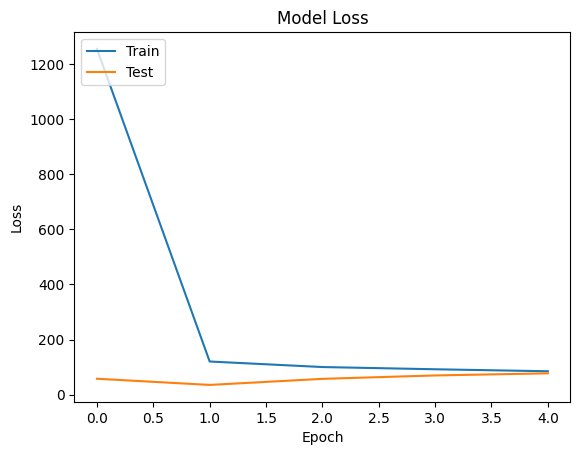

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

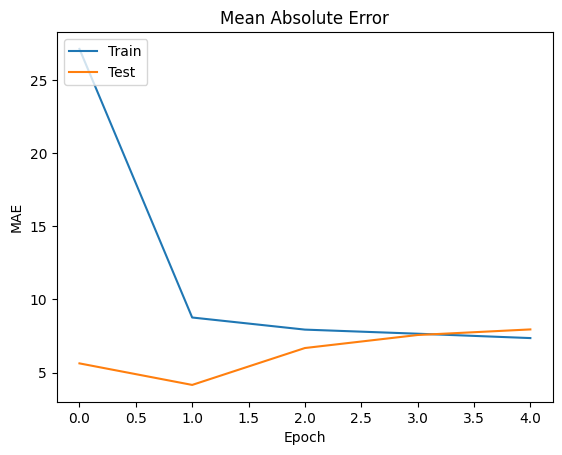

In [184]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()